# Workshop 6: Logistic Regression
#### * Let's finish the skeleton painting!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pic mash for better understanding

In [3]:
pose_array = np.array( [[-0.49126648902893066,-0.16382354497909546,0.0],
                        [-0.5030810236930847,-0.1462211012840271,-0.12090033292770386],
                        [-0.4290885329246521,0.3420290946960449,0.012488692998886108],
                        [-0.5385088920593262,0.8048254251480103,0.06580041348934174],
                        [-0.4689345955848694,-0.1521742343902588,0.11721065640449524],
                        [-0.36572253704071045,0.31261348724365234,0.20495736598968506],
                        [-0.4516284465789795,0.7063550353050232,0.24885067343711853],
                        [-0.4288720190525055,-0.4576428532600403,-0.04007837176322937],
                        [-0.3569672107696533,-0.748015284538269,-0.09235414862632751],
                        [-0.21033641695976257,-0.8595240116119385,-0.11599870026111603],
                        [-0.3256295919418335,-0.9874147772789001,-0.15237876772880554],
                        [-0.3511592447757721,-0.6545630693435669,0.06010124832391739],
                        [-0.3368244171142578,-0.3754662871360779,0.20444586873054504],
                        [-0.16042567789554596,-0.3471113443374634,0.1360340118408203],
                        [-0.38100922107696533,-0.6662216186523438,-0.20743998885154724],
                        [-0.43782952427864075,-0.3520342707633972,-0.2417106032371521],
                        [-0.23194746673107147,-0.24138987064361572,-0.15254870057106018]])

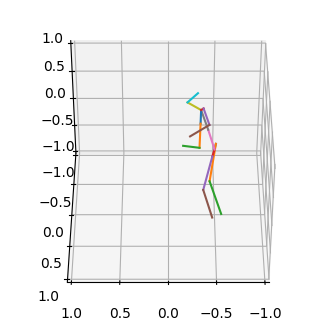

In [4]:
fig = plt.figure(figsize=[4,4])
ax = plt.axes(projection="3d")


ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)


ax.view_init(elev = 40 ,azim = 90) # rotates the 3d space

ax.plot(pose_array[:2,0],pose_array[:2,1],-pose_array[:2,2]) #0-1
ax.plot(pose_array[1:3,0],pose_array[1:3,1],-pose_array[1:3,2]) #1-2
ax.plot(pose_array[2:4,0],pose_array[2:4,1],-pose_array[2:4,2]) #2-3


ax.plot(pose_array[0:5:4,0],pose_array[0:5:4,1],-pose_array[0:5:4,2]) #0-4
ax.plot(pose_array[4:6,0],pose_array[4:6,1],-pose_array[4:6,2]) #4-5
ax.plot(pose_array[5:7,0],pose_array[5:7,1],-pose_array[5:7,2]) #5-6


ax.plot(pose_array[0:8:7,0],pose_array[0:8:7,1],-pose_array[0:8:7,2])
ax.plot(pose_array[7:9:,0],pose_array[7:9:,1],-pose_array[7:9:,2])
ax.plot(pose_array[8:10:,0],pose_array[8:10:,1],-pose_array[8:10:,2])
ax.plot(pose_array[9:11:,0],pose_array[9:11:,1],-pose_array[9:11:,2])

ax.plot(pose_array[8:12:3,0],pose_array[8:12:3,1],-pose_array[8:12:3,2])
ax.plot(pose_array[11:13:,0],pose_array[11:13:,1],-pose_array[11:13:,2])
ax.plot(pose_array[12:14:,0],pose_array[12:14:,1],-pose_array[12:14:,2])


ax.plot(pose_array[8:15:6,0],pose_array[8:15:6,1],-pose_array[8:15:6,2])
ax.plot(pose_array[14:16,0],pose_array[14:16,1],-pose_array[14:16,2])
ax.plot(pose_array[15:17,0],pose_array[15:17,1],-pose_array[15:17,2])

## 1. Linear Equation
$$\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$
### 1.1 What is "weight"?

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### 1.2 How to comput?

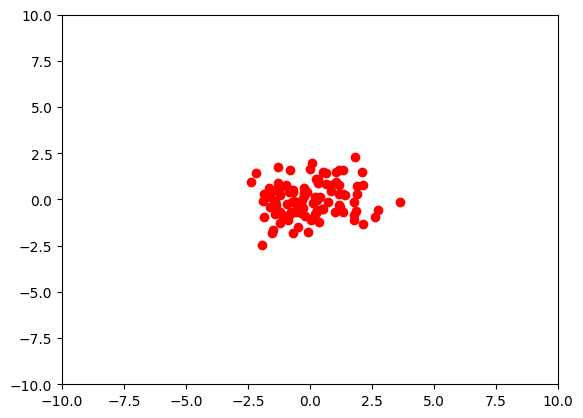

In [6]:
from sklearn.datasets import make_classification

# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.scatter(x[:,0], x[:,1], c="red")

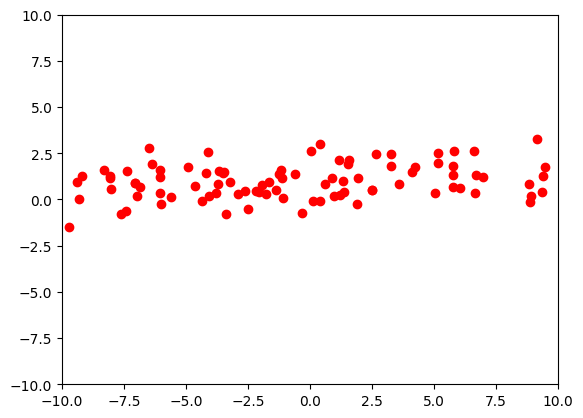

In [7]:
plt.xlim(-10,10)
plt.ylim(-10,10)

# a*x,(y+b)
a = 5
b = 1
plt.scatter(a*x[:,0], x[:,1]+b, c="red")

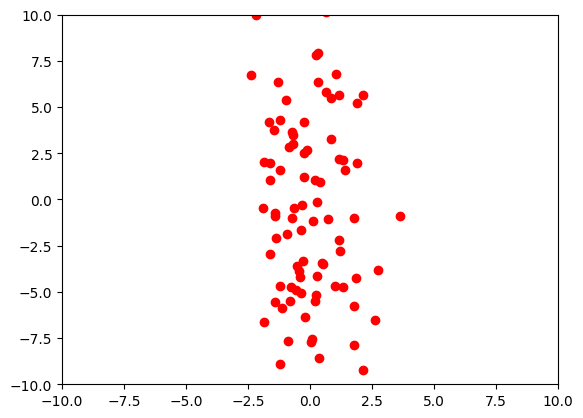

In [8]:
plt.xlim(-10,10)
plt.ylim(-10,10)

# x,y*b
a = 5
b = 7
plt.scatter(x[:,0], x[:,1]*b, c="red")

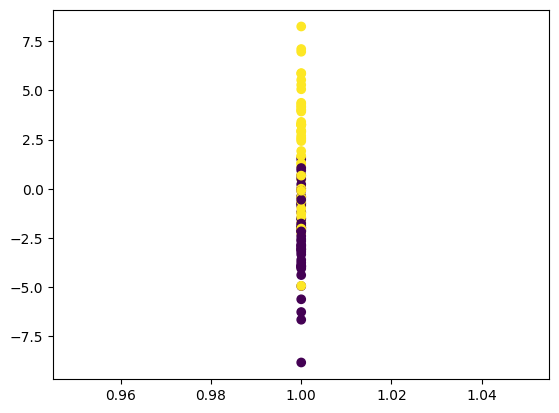

In [10]:
weight = np.array([2,2])
linear_result = x.dot(weight.T)
#linear_result = x@weight.T
index = np.ones(len(linear_result))
plt.scatter(index,linear_result,c = y)

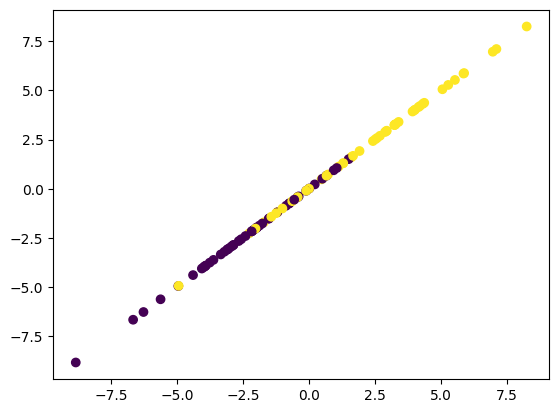

In [11]:
weight = np.array([2,2])
linear_result = x.dot(weight.T)
#linear_result = x@weight.T
#index = np.ones(len(linear_result))
plt.scatter(linear_result,linear_result,c = y)

## 2. Logistic Regression
### 2.1 Prediction function for logistic regression
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$

This is the hypothetical function of logistic regression, also named as the prediction function.

#### Exercise 1. Could you use `Matplotlib` library to draw the graphic of function
$$
h_\theta(z)=\frac{1}{1+e^{-z}}
$$

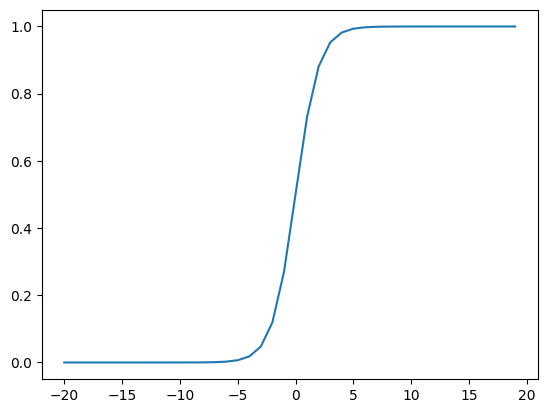

In [25]:
z = np.array([i for i in range(-20,20)])

#np.exp => e
hz = (1/(1+np.exp(-z)))
plt.plot(z,hz)

### 2.2 Cost function
$$
\begin{aligned}
&J(\theta)=\frac{1}{m} \sum_{i=1}^m \operatorname{Cost}\left(h_\theta\left(x^i\right), y^i\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

#### Exercise 2. Could you interpret the equation above to Python code?

In [35]:
weight = np.array ([2,3])
m = len(y)


linear_result = x@weight.T

y_pred = (1/(1+(1/np.exp(linear_result))))
lg = np.log(y_pred)
lg_2 = np.log(1-y_pred)
loss = (-1/m*sum(y*lg+(1-y)*lg_2))
loss

0.4996312657929486

### 2.3 Gradient Descent
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

#### Exercise 3. Complete the rest steps of logistic regression.

In [34]:
features = 1
result = []
alpha = 0.001
result.append(result -(((-1*alpha)/m)*sum((y_pred-y)*features)))
result

0.9999749661158986